In [15]:
import pyscheduling.SMSP.risijwiCi as sm
import pyscheduling.SMSP.riwiCi as sm_ci
import pyscheduling.SMSP.SM_Methods as sm_methods

%load_ext autoreload
%load_ext pycodestyle_magic
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [16]:
instance = sm.risijwiCi_Instance.generate_random(10)

In [20]:
solve_result = sm.Heuristics.list_heuristic(instance, rule_number=1)

In [21]:
print(solve_result.best_solution)

Objective : 5285
Job_schedule (job_id , start_time , completion_time) | objective
(0, 2, 16) : (8, 57, 79) : (2, 135, 176) : (3, 277, 335) : (9, 446, 467) : (4, 518, 546) : (5, 608, 640) : (6, 751, 838) : (1, 969, 1002) : (7, 1112, 1186) | 5285


In [22]:
instance.R

[2, 65, 4, 4, 24, 32, 41, 98, 3, 17]

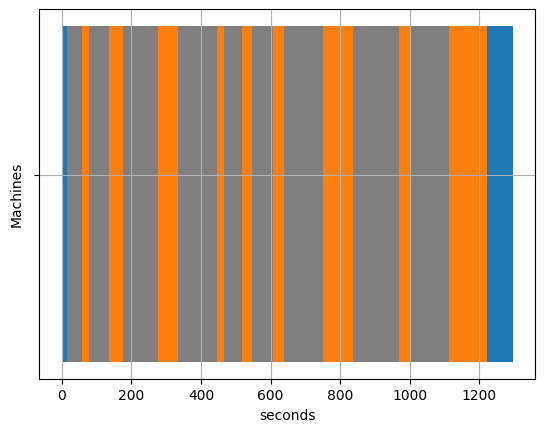

In [23]:
solve_result.best_solution.plot()

In [34]:
instance = sm_ci.riwiCi_Instance.generate_random(10)

In [39]:
%%timeit
solve_result_1 = sm_ci.Heuristics.WSAPT(instance)

25.2 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [40]:
%%timeit
rule = lambda instance, job_id : float(instance.W[job_id])/float(instance.P[job_id])
filter_fun = lambda instance, ci, job_id : instance.R[job_id]<=ci
solve_result_2 = sm_methods.Heuristics.dynamic_dispatch_rule(instance,rule, filter_fun, reverse=True)

84.6 µs ± 910 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
print(solve_result_1)
print(solve_result_2)

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 2055
Job_schedule (job_id , start_time , completion_time) | objective
(6, 0, 2) : (0, 7, 66) : (5, 66, 88) : (7, 88, 113) : (9, 113, 152) : (1, 152, 195) : (8, 195, 255) : (2, 255, 317) : (4, 317, 387) : (3, 387, 480) | 2055 
Runtime is : 6.069301161915064e-05s 
time to best is : -1s 

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 2055
Job_schedule (job_id , start_time , completion_time) | objective
(6, 0, 2) : (0, 7, 66) : (5, 66, 88) : (7, 88, 113) : (9, 113, 152) : (1, 152, 195) : (8, 195, 255) : (2, 255, 317) : (4, 317, 387) : (3, 387, 480) | 2055 
Runtime is : 0.0002623129985295236s 
time to best is : -1s 

